In [9]:
# This file runs the beginners Detectron2 tutorial from here: 
# https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5#scrollTo=ZyAvNCJMmvFF

# Also,checkout the tutorial here: https://detectron2.readthedocs.io/en/latest/tutorials/models.html#model-output-format%20for%20specification

In [10]:

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version


1.7.1 True
gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [11]:
from platform import python_version

print(python_version())

3.7.9


In [31]:
print(cv2.__version__)

3.4.2


In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

print("done")

done


In [ ]:
# Run a pre-trained detectron2 model

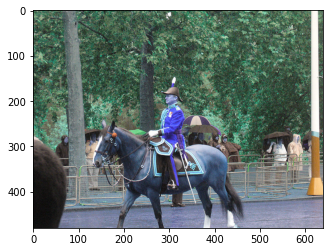

In [18]:
# Download an image from the COCO dataset and display it
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
imgplot = plt.imshow(im)
plt.show()

In [19]:
# Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [20]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:45, 3.95MB/s]                              
/home/jyoti/anaconda3/envs/Pytorch_python_seven/lib/python3.7/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [21]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24],
       device='cuda:0')
Boxes(tensor([[126.6079, 244.8985, 459.8262, 480.0000],
        [251.1091, 157.8117, 338.9722, 413.6374],
        [114.8494, 268.6837, 148.2355, 398.8114],
        [  0.8216, 281.0325,  78.6074, 478.4207],
        [ 49.3956, 274.1234,  80.1547, 342.9806],
        [561.2245, 271.5821, 596.2748, 385.2527],
        [385.9071, 270.3125, 413.7130, 304.0399],
        [515.9294, 278.3738, 562.2791, 389.3832],
        [335.2375, 251.9165, 414.7498, 275.9379],
        [350.9306, 269.2062, 386.0982, 297.9093],
        [331.6287, 230.9995, 393.2758, 257.2010],
        [510.7352, 263.2654, 570.9858, 295.9197],
        [409.0862, 271.8641, 460.5580, 356.8697],
        [506.8768, 283.3263, 529.9409, 324.0395],
        [594.5662, 283.4801, 609.0585, 311.4131]], device='cuda:0'))


In [23]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

In [26]:
type(out)

detectron2.utils.visualizer.VisImage

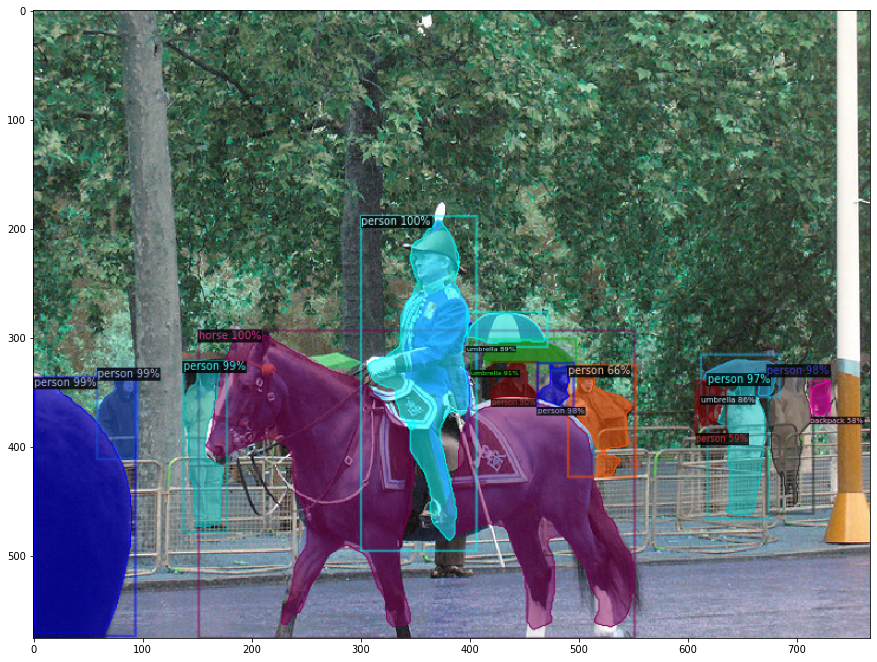

In [30]:
plt.figure(figsize=(15,15))
imgplot = plt.imshow(out.get_image()[:, :, ::-1])
plt.show()